### Allowing inline plots

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Creating ROOT file using root_numpy

In [2]:
import numpy
import root_numpy
# generating random data
data = numpy.random.normal(size=[10000, 2])
# adding names of columns
data = data.view([('first', float), ('second', float)])
# 
root_numpy.array2root(data, filename='./toy_datasets/random.root', treename='tree', mode='recreate')

# Plot function using ROOT

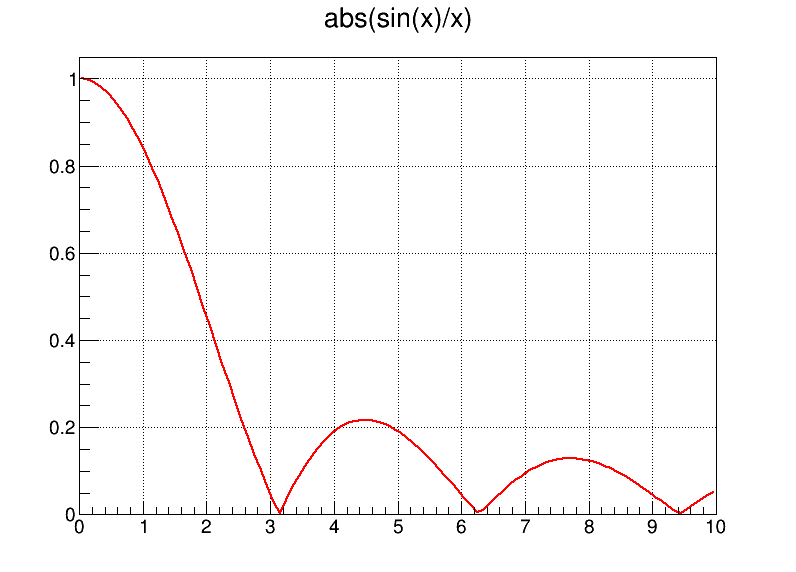

In [3]:
import ROOT
from rep.plotting import default_canvas
canvas = default_canvas()
fun1 = ROOT.TF1( 'fun1', 'abs(sin(x)/x)', 0, 10)
canvas.SetGridx()
canvas.SetGridy()
fun1.Draw()
# Drawing output (last line is considered as output of cell)
canvas

# Plot histogram using ROOT for branch in root file

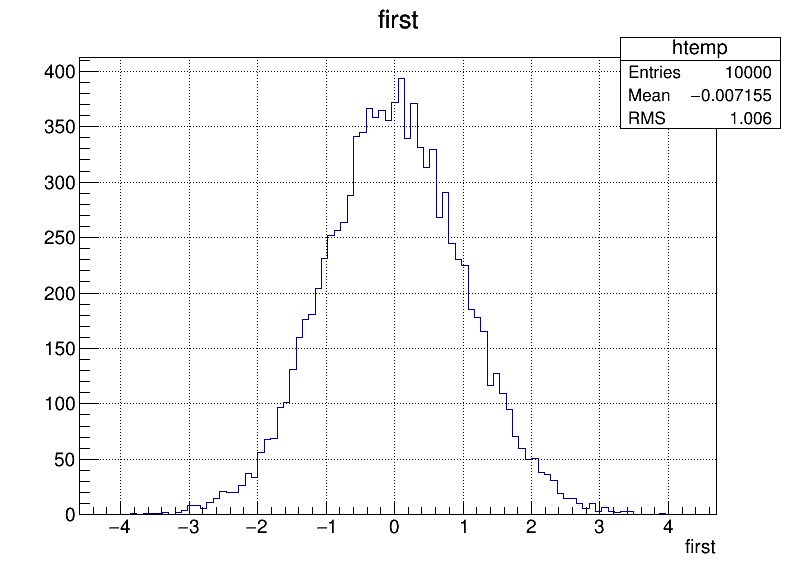

In [4]:
File = ROOT.TFile("toy_datasets/random.root")
Tree = File.Get("tree")
Tree.Draw("first")
canvas

## use histogram settings

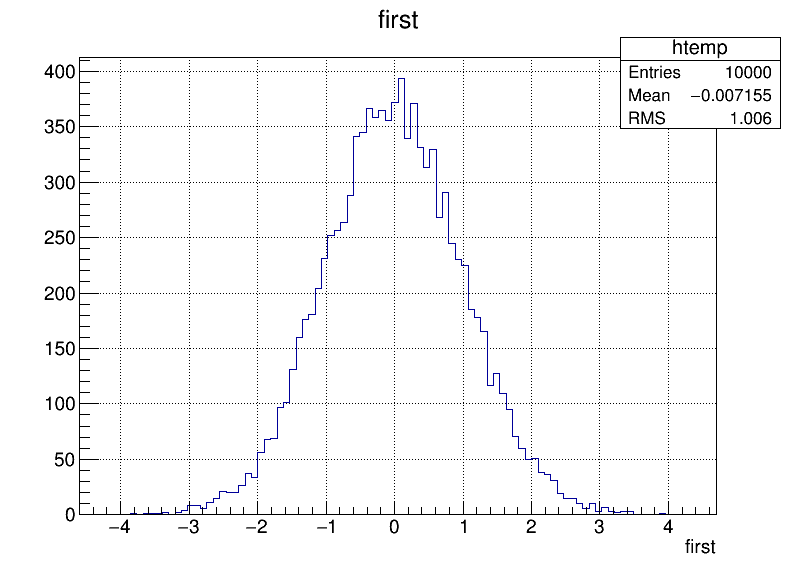

In [5]:
# we need to keep histogram in any variable, otherwise it will be deleted automatically
h1 = ROOT.TH1F("h1","hist from tree",50, -0.25, 0.25)
Tree.Draw("min_DOCA>>h1")
canvas

# root_numpy way

There are two libraries to work with ROOT files

* rootpy http://www.rootpy.org - direct wrapper to ROOT methods.
* root_numpy http://rootpy.github.io/root_numpy/ - new-style, efficient and simple library to deal with ROOT files from python

Let's show how to use the second library.

In [6]:
data = root_numpy.root2array("toy_datasets/random.root", 
                             treename='tree', 
                             branches=['first', 'second', 'sin(first) * exp(second)'], 
                             selection='first > 0')

__in example above__ we selected three branches (one of which is an expression and will be computed on-the-fly) and selections

In [7]:
# taking, i.e. first 10 elements:
data2 = data[:10]

### convert to pandas

In [8]:
import pandas
dataframe = pandas.DataFrame(data)
# looking ar first elements
dataframe.head()

,first,second,sin(first) * exp(second)
0,3.262717,0.907565,-0.299447
1,0.428380,-0.357081,0.290661
2,0.774365,-0.155079,0.598811
3,1.230673,-0.445453,0.603840
4,0.322869,-1.200220,0.095544


## Histograms in python

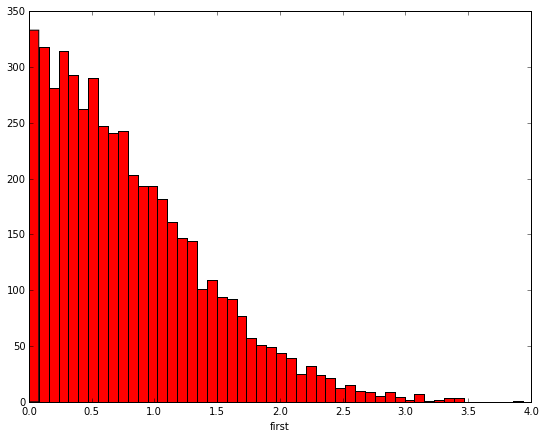

In [9]:
figure(figsize=(9, 7))
hist(data['first'], bins=50)
xlabel('first')

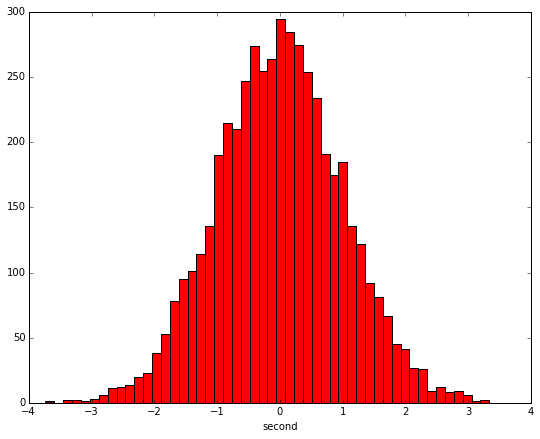

In [10]:
figure(figsize=(9, 7))
hist(data['second'], bins=50)
xlabel('second')